The Python code for function $x^4 - 4x^2 +3x$ looks like this:

In [1]:
def p(x):
    return x**4 - 4*x**2 + 3*x

for x in [-1, 0, 2, 3.4]:
    print(x, p(x))

-1 -6
0 0
2 6
3.4 97.59359999999998


We can plot the function in a simple way with Matplotlib:

The values generated for the x-axis are the following:
[-3.   -2.94 -2.88 -2.82 -2.76 -2.7  -2.64 -2.58 -2.52 -2.46 -2.4  -2.34
 -2.28 -2.22 -2.16 -2.1  -2.04 -1.98 -1.92 -1.86 -1.8  -1.74 -1.68 -1.62
 -1.56 -1.5  -1.44 -1.38 -1.32 -1.26 -1.2  -1.14 -1.08 -1.02 -0.96 -0.9
 -0.84 -0.78 -0.72 -0.66 -0.6  -0.54 -0.48 -0.42 -0.36 -0.3  -0.24 -0.18
 -0.12 -0.06  0.    0.06  0.12  0.18  0.24  0.3   0.36  0.42  0.48  0.54
  0.6   0.66  0.72  0.78  0.84  0.9   0.96  1.02  1.08  1.14  1.2   1.26
  1.32  1.38  1.44  1.5   1.56  1.62  1.68  1.74  1.8   1.86  1.92  1.98
  2.04  2.1   2.16  2.22  2.28  2.34  2.4   2.46  2.52  2.58  2.64  2.7
  2.76  2.82  2.88  2.94]


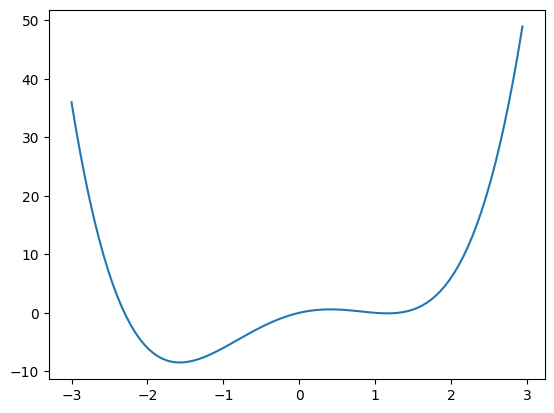

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-3, 3, 100, endpoint=False)
print("The values generated for the x-axis are the following:")
print(X)
F = p(X)
plt.plot(X,F)

plt.show()

A polynomial is uniquely determined by its coefficients. This means, an instance of our polynomial class needs a list or tuple to define the coefficients.

In [8]:
class Polynomial:
    def __init__(self, *coefficients):
        """ 
        input: coefficients are in the form a_n, ...a_1, a_0 
        """
        self.coefficients = list(coefficients) # tuple is turned into a list
     
    def __call__(self, x): 
        """
        It makes possible to use an instance of this class as a function
        that evaluates a polynomial
        """   
        res = 0
        for index, coeff in enumerate(self.coefficients[::-1]):
            print(f"index = {index}, coefficient = {coeff} ")
            res += coeff * x** index
        return res
    
    def __repr__(self):
        """
        method to return the canonical string representation 
        of a polynomial.
        """
        return "Polynomial" + str(tuple(self.coefficients))

    
    def __str__(self):
        def x_expr(degree):
            if degree == 0:
                res = ""
            elif degree == 1:
                res = "x"
            else:
                res = "x^"+str(degree)
            return res

        degree = len(self.coefficients) - 1
        res = ""

        for i in range(0, degree+1):
            coeff = self.coefficients[i]
            # nothing has to be done if coeff is 0:
            if abs(coeff) == 1 and i < degree:
                # 1 in front of x shouldn't occur, e.g. x instead of 1x
                # but we need the plus or minus sign:
                res += f"{'+' if coeff>0 else '-'}{x_expr(degree-i)}"  
            elif coeff != 0:
                res += f"{coeff:+g}{x_expr(degree-i)}" 

        return res.lstrip('+')    # removing leading '+'

In [9]:
p = Polynomial(1, 0, -4, 3, 0)
print(p)
print(f"p(2) = {p(2)}")

x^4-4x^2+3x
index = 0, coefficient = 0 
index = 1, coefficient = 3 
index = 2, coefficient = -4 
index = 3, coefficient = 0 
index = 4, coefficient = 1 
p(2) = 6


In [13]:
p2 = eval(repr(p)) # eval invokes __repr__
print(f"string formed with magic method str {p2}")
print(f"string formed with magic method repr {repr(p2)}")
print(f"p = {p}")

string formed with magic method str x^4-4x^2+3x
string formed with magic method repr Polynomial(1, 0, -4, 3, 0)
p = x^4-4x^2+3x


In [14]:
eval(repr(p))

Polynomial(1, 0, -4, 3, 0)

In [15]:
repr(p)

'Polynomial(1, 0, -4, 3, 0)'

In [8]:
polys = [Polynomial(1, 0, -4, 3, 0),
         Polynomial(2, 0),
         Polynomial(4, 1, -1),
         Polynomial(3, 0, -5, 2, 7),
         Polynomial(-42)]

# output suitable for usage in LaTeX:
for count, poly in enumerate(polys):
    print(f"$p_{count} = {str(poly)}$")

$p_0 = x^4-4x^2+3x$
$p_1 = 2x$
$p_2 = 4x^2+x-1$
$p_3 = 3x^4-5x^2+2x+7$
$p_4 = -42$


### The above output rendered in Mardown

$p_0 = x^4-4x^2+3x$

$p_1 = 2x$

$p_2 = 4x^2+x-1$

$p_3 = 3x^4-5x^2+2x+7$

$p_4 = -42$

In [16]:
p = Polynomial(3, 0, -5, 2, 1)
print(p)

3x^4-5x^2+2x+1


$3x^4-5x^2+2x+1$

In [17]:
for x in range(-3, 3):
    print(x, p(x))

index = 0, coefficient = 1 
index = 1, coefficient = 2 
index = 2, coefficient = -5 
index = 3, coefficient = 0 
index = 4, coefficient = 3 
-3 193
index = 0, coefficient = 1 
index = 1, coefficient = 2 
index = 2, coefficient = -5 
index = 3, coefficient = 0 
index = 4, coefficient = 3 
-2 25
index = 0, coefficient = 1 
index = 1, coefficient = 2 
index = 2, coefficient = -5 
index = 3, coefficient = 0 
index = 4, coefficient = 3 
-1 -3
index = 0, coefficient = 1 
index = 1, coefficient = 2 
index = 2, coefficient = -5 
index = 3, coefficient = 0 
index = 4, coefficient = 3 
0 1
index = 0, coefficient = 1 
index = 1, coefficient = 2 
index = 2, coefficient = -5 
index = 3, coefficient = 0 
index = 4, coefficient = 3 
1 1
index = 0, coefficient = 1 
index = 1, coefficient = 2 
index = 2, coefficient = -5 
index = 3, coefficient = 0 
index = 4, coefficient = 3 
2 33


The following instruction reverse the coefficients list:

```python
coefficients[::-1]




In [19]:
coefficients = [3, 0, -5, 2, 1]
print(coefficients[::-1])

[1, 2, -5, 0, 3]


In [20]:
class Polynomial2:
    
    def __init__(self, *coefficients):
        """ input: coefficients are in the form a_n, ...a_1, a_0 
        """
        self.coefficients = list(coefficients) # tuple is turned into a list
         
    # The __repr__ and __str__ method can be included here,
    # but is not necessary for the immediately following code
    
    def __call__(self, x):    
        res = 0
        for coeff in self.coefficients:
            res = res * x + coeff
        return res 

In [13]:
p1 = Polynomial(-4, 3, 0)
p2 = Polynomial2(-4, 3, 0)
res = all((p1(x)==p2(x) for x in range(-10, 10)))
print(res)

index = 0, coefficient = 0 
index = 1, coefficient = 3 
index = 2, coefficient = -4 
index = 0, coefficient = 0 
index = 1, coefficient = 3 
index = 2, coefficient = -4 
index = 0, coefficient = 0 
index = 1, coefficient = 3 
index = 2, coefficient = -4 
index = 0, coefficient = 0 
index = 1, coefficient = 3 
index = 2, coefficient = -4 
index = 0, coefficient = 0 
index = 1, coefficient = 3 
index = 2, coefficient = -4 
index = 0, coefficient = 0 
index = 1, coefficient = 3 
index = 2, coefficient = -4 
index = 0, coefficient = 0 
index = 1, coefficient = 3 
index = 2, coefficient = -4 
index = 0, coefficient = 0 
index = 1, coefficient = 3 
index = 2, coefficient = -4 
index = 0, coefficient = 0 
index = 1, coefficient = 3 
index = 2, coefficient = -4 
index = 0, coefficient = 0 
index = 1, coefficient = 3 
index = 2, coefficient = -4 
index = 0, coefficient = 0 
index = 1, coefficient = 3 
index = 2, coefficient = -4 
index = 0, coefficient = 0 
index = 1, coefficient = 3 
index = 2

In [1]:
def zip_longest(iter1, iter2, fillvalue=None):
    '''Fill the shorter iterable with fillvalue if the other iterable has more elements. '''
    
    for i in range(max(len(iter1), len(iter2))):
        if i >= len(iter1):
            yield (fillvalue, iter2[i])
        elif i >= len(iter2):
            yield (iter1[i], fillvalue)
        else:
            yield (iter1[i], iter2[i])
        i += 1

p1 = (2,9,8,7,5,7)
p2 = (-1, 4, 5)
print(zip_longest(p1, p2, fillvalue=0))
for x in zip_longest(p1, p2, fillvalue=0):
    print(x)

<generator object zip_longest at 0x0000022883929DD0>
(2, -1)
(9, 4)
(8, 5)
(7, 0)
(5, 0)
(7, 0)


In [15]:



class Polynomial:
    
    def __init__(self, *coefficients):
        """ input: coefficients are in the form a_n, ...a_1, a_0 
        """
        self.coefficients = list(coefficients) # tuple is turned into a list
     
    def __repr__(self):
        """
        method to return the canonical string representation 
        of a polynomial.
   
        """
        return "Polynomial" + str(self.coefficients)
    
    def __str__(self):
        
        def x_expr(degree):
            if degree == 0:
                res = ""
            elif degree == 1:
                res = "x"
            else:
                res = "x^"+str(degree)
            return res

        degree = len(self.coefficients) - 1
        res = ""

        for i in range(0, degree+1):
            coeff = self.coefficients[i]
            # nothing has to be done if coeff is 0:
            if abs(coeff) == 1 and i < degree:
                # 1 in front of x shouldn't occur, e.g. x instead of 1x
                # but we need the plus or minus sign:
                res += f"{'+' if coeff>0 else '-'}{x_expr(degree-i)}"  
            elif coeff != 0:
                res += f"{coeff:+g}{x_expr(degree-i)}" 

        return res.lstrip('+')    # removing leading '+'
            
    def __call__(self, x):    
        res = 0
        for coeff in self.coefficients:
            res = res * x + coeff
        return res 
    
    def degree(self):
        return len(self.coefficients)   
            
    def __add__(self, other):
        c1 = self.coefficients[::-1]
        c2 = other.coefficients[::-1]
        res = [sum(t) for t in zip_longest(c1, c2, fillvalue=0)]
        return Polynomial(*res[::-1])
    
    def __sub__(self, other):
        c1 = self.coefficients[::-1]
        c2 = other.coefficients[::-1]
        
        res = [t1-t2 for t1, t2 in zip_longest(c1, c2, fillvalue=0)]
        return Polynomial(*res[::-1])
    
    def __mul__(self, other):
        return Polynomial(-15, 24, 0, 10, -49, +56, 0, 20, -70)


In [16]:
p1 = Polynomial(4, 0, -4, 3, 0)
p2 = Polynomial(-0.8, 2.3, 0.5, 1, 0.2)

p_sum = p1 + p2
p_diff = p1 - p2


print("p1(x) = ", p1)
print("p2(x) = ", p2)
print("p1(x) + p2(x) = ", p_sum)
print("p1(x) - p2(x) = ", p_diff)


p1(x) =  4x^4-4x^2+3x
p2(x) =  -0.8x^4+2.3x^3+0.5x^2+x+0.2
p1(x) + p2(x) =  3.2x^4+2.3x^3-3.5x^2+4x+0.2
p1(x) - p2(x) =  4.8x^4-2.3x^3-4.5x^2+2x-0.2


The following is an example of how your application should run when you implement the multiplication operation:

In [17]:
p1 = Polynomial(-3, 0, 0, 2, -7)
p2 = Polynomial(5, -8, 0, 0, 10)
print(f"p1(x) = {p1}")
print(f"p2(x) = {p2}")
print(f"p1(x) + p2(x) = {(p1 + p2)}")
print(f"p1(x) * p2(x) = {(p1 * p2)}") # return Polynomial(-15, 24, 0, 10, -49, +56, 0, 20, -7


p1(x) = -3x^4+2x-7
p2(x) = 5x^4-8x^3+10
p1(x) + p2(x) = 2x^4-8x^3+2x+3
p1(x) * p2(x) = -15x^8+24x^7+10x^5-49x^4+56x^3+20x-70


$p1(x) = -3x^4+2x-7$

$p2(x) = 5x^4-8x^3+10$

$p1(x) + p2(x) = 2x^4-8x^3+2x+3$

$p1(x) * p2(x) = -15x^8+24x^7+10x^5-49x^4+56x^3+20x-70$

Code to help us understand the differece bettween the zip and zip_longest methods

The zip method joins two lists up to the shortest one

In [18]:
name = ["Pedro", "Jose", "Edrian"]
age = [20, 22]
for t in zip(name, age):
    print(t)

('Pedro', 20)
('Jose', 22)


The zip_longest method joins two list up to the longest one, filling the items of the shortest list with the specifed value (fillvalue)

In [4]:
name = ["Pedro", "Jose", "Edrian"]
age = [20, 22]
for t in zip_longest(name, age, '-'):
    print(t)

('Pedro', 20)
('Jose', 22)
('Edrian', '-')
